In [1]:
import pandas as pd
import numpy as np
import calendar
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
policy_data = pd.read_csv("OxCGRT_latest_responses.csv")

In [3]:
Irish_policies = policy_data[policy_data['CountryName'] == "Ireland"]

In [7]:
Irish_policies.to_csv("Irish_policies.csv")

In [8]:
Irish_policies['StartDate'] = pd.to_datetime(Irish_policies['StartDate'].astype(str), format='%Y%m%d')

In [9]:
Irish_policies['EndDate'] = pd.to_datetime(Irish_policies['EndDate'].astype(str), format='%Y%m%d')

In [10]:
flags = Irish_policies[Irish_policies['Flag'] == 1]

In [11]:
data = pd.read_csv("owid-covid-data_Ireland.csv", index_col = "date")
data = data[(data.index >= "2020-03-01") & (data.index <= "2021-11-01")]
ireland_data = data[data['location'] == "Ireland"]
ireland_data.index = pd.DatetimeIndex(ireland_data.index)

In [12]:
ireland_data['Policy_Flag'] = 0

In [13]:
ireland_data

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,Policy_Flag
date,,,,,,,,,,,,,,,,,,,,,
2020-03-01,IRL,Europe,Ireland,1.0,0.0,NaN,NaN,NaN,NaN,0.201,...,25.7,NaN,2.96,82.3,0.955,NaN,NaN,NaN,NaN,0
2020-03-02,IRL,Europe,Ireland,1.0,0.0,NaN,NaN,NaN,NaN,0.201,...,25.7,NaN,2.96,82.3,0.955,NaN,NaN,NaN,NaN,0
2020-03-03,IRL,Europe,Ireland,2.0,1.0,NaN,NaN,NaN,NaN,0.401,...,25.7,NaN,2.96,82.3,0.955,NaN,NaN,NaN,NaN,0
2020-03-04,IRL,Europe,Ireland,6.0,4.0,NaN,NaN,NaN,NaN,1.204,...,25.7,NaN,2.96,82.3,0.955,NaN,NaN,NaN,NaN,0
2020-03-05,IRL,Europe,Ireland,6.0,0.0,NaN,NaN,NaN,NaN,1.204,...,25.7,NaN,2.96,82.3,0.955,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-28,IRL,Europe,Ireland,438124.0,2598.0,2123.429,5436.0,0.0,9.571,87925.435,...,25.7,NaN,2.96,82.3,0.955,NaN,NaN,NaN,NaN,0
2021-10-29,IRL,Europe,Ireland,440665.0,2541.0,2134.286,5436.0,0.0,9.571,88435.378,...,25.7,NaN,2.96,82.3,0.955,NaN,NaN,NaN,NaN,0
2021-10-30,IRL,Europe,Ireland,443631.0,2966.0,2211.286,5436.0,0.0,9.571,89030.613,...,25.7,NaN,2.96,82.3,0.955,NaN,NaN,NaN,NaN,0


In [14]:
for row in flags.index:
    start_date = flags.loc[row, "StartDate"]
    if start_date in ireland_data.index:
        ireland_data.loc[start_date, "Policy_Flag"] = 1


In [15]:
ireland_data['delta_cases_per_capita'] = ireland_data['total_cases'].divide(ireland_data['population']).diff().fillna(0)

In [16]:
ireland_data['delta_deaths_per_capita'] = ireland_data['total_deaths'].divide(ireland_data['population']).diff().fillna(0)

In [17]:
ireland_data['Policy_Flag.l7'] = ireland_data['Policy_Flag'].shift(7).fillna(0)

In [18]:
ireland_data['Policy_Flag.l30'] = ireland_data['Policy_Flag'].shift(30).fillna(0)

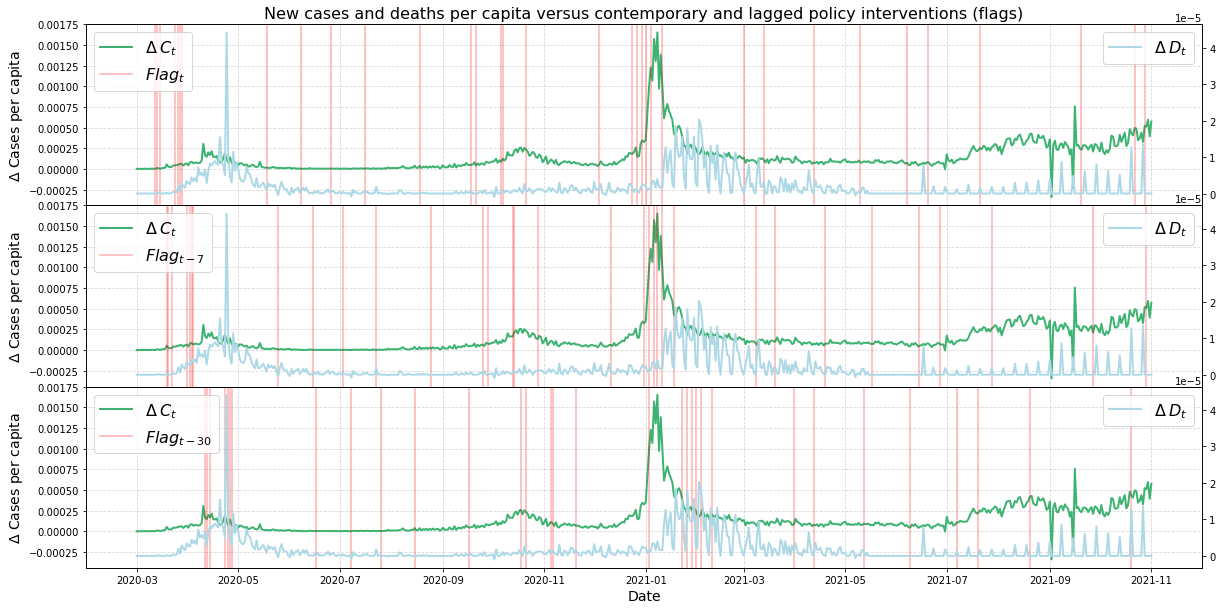

In [19]:
fig, ax = plt.subplots(nrows = 3, sharex=True, gridspec_kw={"hspace": 0})

fig.set_size_inches(20, 10)

twin_ax0 = ax[0].twinx()
ax[0].plot(ireland_data['delta_cases_per_capita'], color = 'mediumseagreen', linewidth = 2)
twin_ax0.plot(ireland_data['delta_deaths_per_capita'], color = 'lightblue', linewidth = 2)
for i in ireland_data.index:
    if ireland_data.loc[i, "Policy_Flag"] == 1:
        ax[0].axvline(i, color = 'red', alpha = 0.3)

ax[0].legend([r"$\Delta \: C_t$", r"$Flag_t$"], fontsize = 16, loc = 2)

twin_ax0.legend([r"$\Delta \: D_t$"], fontsize = 16, loc = 1)

ax[0].set_xlabel("", fontsize = 14)
ax[0].set_ylabel(r"$\Delta$ Cases per capita", fontsize = 14)
ax[0].set_title("New cases and deaths per capita versus contemporary and lagged policy interventions (flags)", fontsize = 16)
ax[0].grid(linestyle = '--', alpha = 0.5)

ax[1].plot(ireland_data['delta_cases_per_capita'], color = 'mediumseagreen', linewidth = 2)

twin_ax1 = ax[1].twinx()
twin_ax1.plot(ireland_data['delta_deaths_per_capita'], color = 'lightblue', linewidth = 2)

for i in ireland_data.index:
    if ireland_data.loc[i, "Policy_Flag.l7"] == 1:
        ax[1].axvline(i, color = 'red', alpha = 0.3)
        
ax[1].set_xlabel("Date", fontsize = 14)
ax[1].set_ylabel(r"$\Delta$ Cases per capita", fontsize = 14)
ax[1].grid(linestyle = '--', alpha = 0.5)
ax[1].legend([r"$\Delta \: C_t$", r"$Flag_{t-7}$"], fontsize = 16, loc = 2)
twin_ax1.legend([r"$\Delta \: D_t$"], fontsize = 16, loc = 1)



ax[2].plot(ireland_data['delta_cases_per_capita'], color = 'mediumseagreen', linewidth = 2)

twin_ax2 = ax[2].twinx()
twin_ax2.plot(ireland_data['delta_deaths_per_capita'], color = 'lightblue', linewidth = 2)

for i in ireland_data.index:
    if ireland_data.loc[i, "Policy_Flag.l30"] == 1:
        ax[2].axvline(i, color = 'red', alpha = 0.3)
        
ax[2].set_xlabel("Date", fontsize = 14)
ax[2].set_ylabel(r"$\Delta$ Cases per capita", fontsize = 14)
ax[2].grid(linestyle = '--', alpha = 0.5)
ax[2].legend([r"$\Delta \: C_t$", r"$Flag_{t-30}$"], fontsize = 16, loc = 2)
twin_ax2.legend([r"$\Delta \: D_t$"], fontsize = 16, loc = 1)

In [20]:
cases = pd.DataFrame([ireland_data["delta_cases_per_capita"], ireland_data["Policy_Flag"],ireland_data["Policy_Flag.l7"], ireland_data["Policy_Flag.l30"]]).transpose()

[Text(0.5, 0, '$\\Delta C_t$'),
 Text(1.5, 0, '$Flag_t$'),
 Text(2.5, 0, '$Flag_{t-7}$'),
 Text(3.5, 0, '$Flag_{t-30}$')]

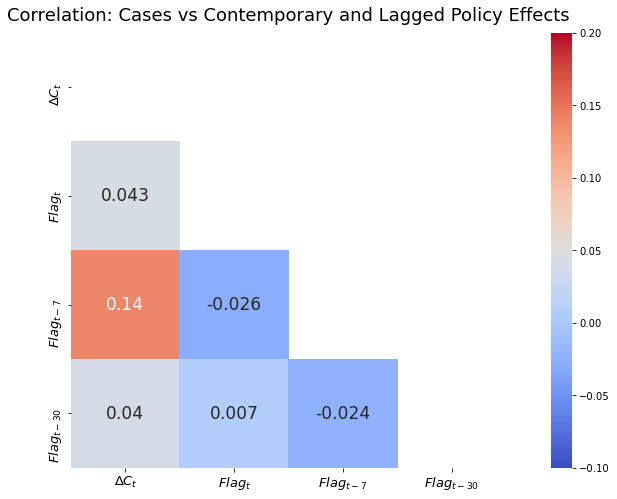

In [21]:
import seaborn as sns
plt.figure(figsize = (16, 8))

mask = np.triu(np.ones_like(cases.corr(), dtype=bool))

axis_labels = [r'$\Delta C_t$', r'$Flag_t$', r'$Flag_{t-7}$', r'$Flag_{t-30}$'] # labels for x-axis

heatmap = sns.heatmap(cases.corr(), mask = mask, annot = True, cmap = "coolwarm", vmin = -0.1, vmax = 0.2, xticklabels=axis_labels, yticklabels=axis_labels,  annot_kws={"size": 17}, square = True)
heatmap.set_title('Correlation: Cases vs Contemporary and Lagged Policy Effects', fontdict={'fontsize':18}, pad=12);
heatmap.set_yticklabels(heatmap.get_yticklabels(), size =13 )
heatmap.set_xticklabels(heatmap.get_xticklabels(), size =13 )

In [22]:
deaths = pd.DataFrame([ireland_data["delta_deaths_per_capita"], ireland_data["Policy_Flag"],ireland_data["Policy_Flag.l7"], ireland_data["Policy_Flag.l30"]]).transpose()

[Text(0.5, 0, '$\\Delta C_t$'),
 Text(1.5, 0, '$Flag_t$'),
 Text(2.5, 0, '$Flag_{t-7}$'),
 Text(3.5, 0, '$Flag_{t-30}$')]

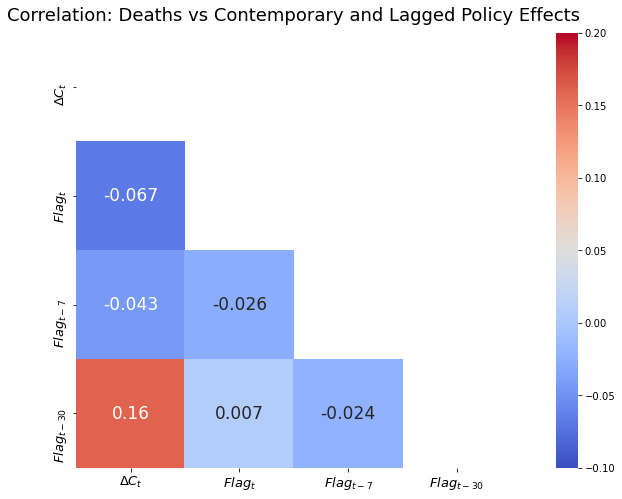

In [23]:
import seaborn as sns
plt.figure(figsize = (16, 8))

mask = np.triu(np.ones_like(deaths.corr(), dtype=bool))

axis_labels = [r'$\Delta C_t$', r'$Flag_t$', r'$Flag_{t-7}$', r'$Flag_{t-30}$'] # labels for x-axis

heatmap = sns.heatmap(deaths.corr(), mask = mask, annot = True, cmap = "coolwarm", vmin = -0.1, vmax = 0.2, xticklabels=axis_labels, yticklabels=axis_labels,  annot_kws={"size": 17}, square = True)
heatmap.set_title('Correlation: Deaths vs Contemporary and Lagged Policy Effects', fontdict={'fontsize':18}, pad=12);
heatmap.set_yticklabels(heatmap.get_yticklabels(), size =13 )
heatmap.set_xticklabels(heatmap.get_xticklabels(), size =13 )